**Import Needed Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

**Uploading files in google colab**

In [2]:
from google.colab import files
fetch_file = files.upload()


Saving loan_approval_dataset.csv to loan_approval_dataset.csv


# **Introduction**

In the world of finance, the ‘Loan Approval Prediction’ dataset is a important resource that entails factors affecting loan approval. The features in this dataset are crucial in determining loan approval outcomes, interest rates and collateral. The dataset investigates the relationship among these features and the outcome of interest, loan status (approved or denied). This dataset offers a diverse set of features encompassing demographic, financial data, and assets-related information that are correlated with each other, it encourages in-depth analysis of this dataset. Through this analysis, we aim to provide insights for borrowers and lending institutions on optimizing loan applications and asset portfolios. We strive to offer data-driven guidance to enhance loan approval outcomes and empower people and businesses financially using predictive models.

# **Proposed Analytical Question**

How do various demographic, financial, and asset-related factors influence loan approval outcomes in the context of this dataset?

# **Features Definition**

There are 13 columns and 4269 rows in the dataset. The accuracy of prediction is strongly related to the dataset size, hence my decision to select a dataset with sufficient rows.
Dataset features are as follows:

•Loan ID: unique identifier for each loan application entry

•No of dependants: number of persons relying financially on loan applicant

•Education: indicates educational level attained by the loan applicant

•Self Employed: Indicates whether the borrower is self-employed or not.

•Income Annum: This is the borrower’s annual income.

•Loan Amount: Indicates the amount of money the borrower is requested for as a loan.

•Loan Term: Duration of loan, affecting monthly payments and interest costs.

•CIBIL Score: Borrower’s credit score, reflecting their creditworthiness.

•Residential assets value: Value of borrower’s residential asset, can serve as collateral for loan.

•Commercial assets value: Value of borrower’s commercial asset, can serve as collateral for loan.

•Luxury assets value: Value of borrower’s luxury assets, contributing to overall financial profile.

•Bank assets value: Indicates value of assets held in the bank, showing ability to repay loan and financial stability.

•Loan Status: Outcome of interest in the analysis indicating whether loan was approved or not.



**Loading and Previewing the loan approval dataset**

In [3]:
pred_data = pd.read_csv('loan_approval_dataset.csv')
print(pred_data.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

# **Data Cleaning**

Check for non Values

In [4]:
# Summary of Missing Values in Pred Data : There are no missing values in our dataset
pred_data.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
#checking for duplicates entries/rows : There are no duplicate entries/rows in our dataset
print("duplicate count: ",pred_data.duplicated().sum())

duplicate count:  0


# **Feature Engineering**

In [6]:
# Dropping loan id because its of no use to the model
pred_data.drop(columns = ['loan_id'], inplace = True)
pred_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
# Overview of dataset dimensions: The Loan approval dataset currently has 11 relevant input features/columns and 1 output of interest(loan status), it also has 4269 rows. Because it is moderately sized and provides enough data for insights and model building without being unduly large or prone to overfitting, a dataset with 12 columns and 4269 rows is good for analysis and modeling. Because of its manageable scale, modeling and exploration can be completed more quickly and with less thorough cleaning and preprocessing.
print('Overview of dataset dimensions: ', pred_data.shape)

Overview of dataset dimensions:  (4269, 12)


In [8]:
# Pred_data.info: An Overview of the Dataset Structure. There are 9 integer data type and 3 string data type in our dataset and memory being used is 400.3+kb
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


**Establishing columns for Liquid Assets and Fixed Assets**


In the 'pred_data', the code adds new columns.
Liquid Assets: Determined by adding the values of "luxury assets" and "bank asset value."
The value of "residential assets" and "commercial assets" is added up to get fixed assets.

By combining the views of fixed and liquid assets in the dataset, these new columns consolidate the corresponding asset types. this feature engineering also enhances our modelling

In [9]:
# Establishing Columns for Liquid Assets and Fixed Assets
pred_data = pred_data.assign(Liquid_assets=pred_data[' bank_asset_value'] + pred_data[' luxury_assets_value'], Fixed_assets=pred_data[' residential_assets_value'] + pred_data[' commercial_assets_value'])

In [10]:
# Removing Particular Columns from "pred_data" because new ones were created from them
pred_data = pred_data[pred_data.columns.difference([' bank_asset_value', ' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value'])]

In [11]:
#Now lets overview our new dataset's look
pred_data.head()

,cibil_score,education,income_annum,loan_amount,loan_status,loan_term,no_of_dependents,self_employed,Fixed_assets,Liquid_assets
0,778,Graduate,9600000,29900000,Approved,12,2,No,20000000,30700000
1,417,Not Graduate,4100000,12200000,Rejected,8,0,Yes,4900000,12100000
2,506,Graduate,9100000,29700000,Rejected,20,3,No,11600000,46100000
3,467,Graduate,8200000,30700000,Rejected,8,3,No,21500000,31200000
4,382,Not Graduate,9800000,24200000,Rejected,20,5,Yes,20600000,34400000


# **Exploratory Data Analysis**

**Exploring Numerical Insights in Loan Approval Dataset**

The action of utilizing the describe() method to explore and extract numerical insights from the dataset is highlighted in this title. It emphasizes the need to concentrate on numerical features and statistical summaries in order to obtain preliminary understanding of the numerical properties of the dataset.

In [12]:
pred_data.describe()

,cibil_score,income_annum,loan_amount,loan_term,no_of_dependents,Fixed_assets,Liquid_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,599.936051,5.059124e+06,1.513345e+07,10.900445,2.498712,1.244577e+07,2.010300e+07
std,172.430401,2.806840e+06,9.043363e+06,5.709187,1.695910,9.232541e+06,1.183658e+07
min,300.000000,2.000000e+05,3.000000e+05,2.000000,0.000000,-1.000000e+05,3.000000e+05
25%,453.000000,2.700000e+06,7.700000e+06,6.000000,1.000000,4.900000e+06,1.000000e+07
50%,600.000000,5.100000e+06,1.450000e+07,10.000000,3.000000,1.060000e+07,1.960000e+07
75%,748.000000,7.500000e+06,2.150000e+07,16.000000,4.000000,1.820000e+07,2.910000e+07
max,900.000000,9.900000e+06,3.950000e+07,20.000000,5.000000,4.660000e+07,5.380000e+07


**Pairplot of our dataset** : This generates a diagonal histogram and a grid of scatterplots for numerical variable pairs, providing a thorough understanding of the relationships, distributions, and patterns present in our dataset.

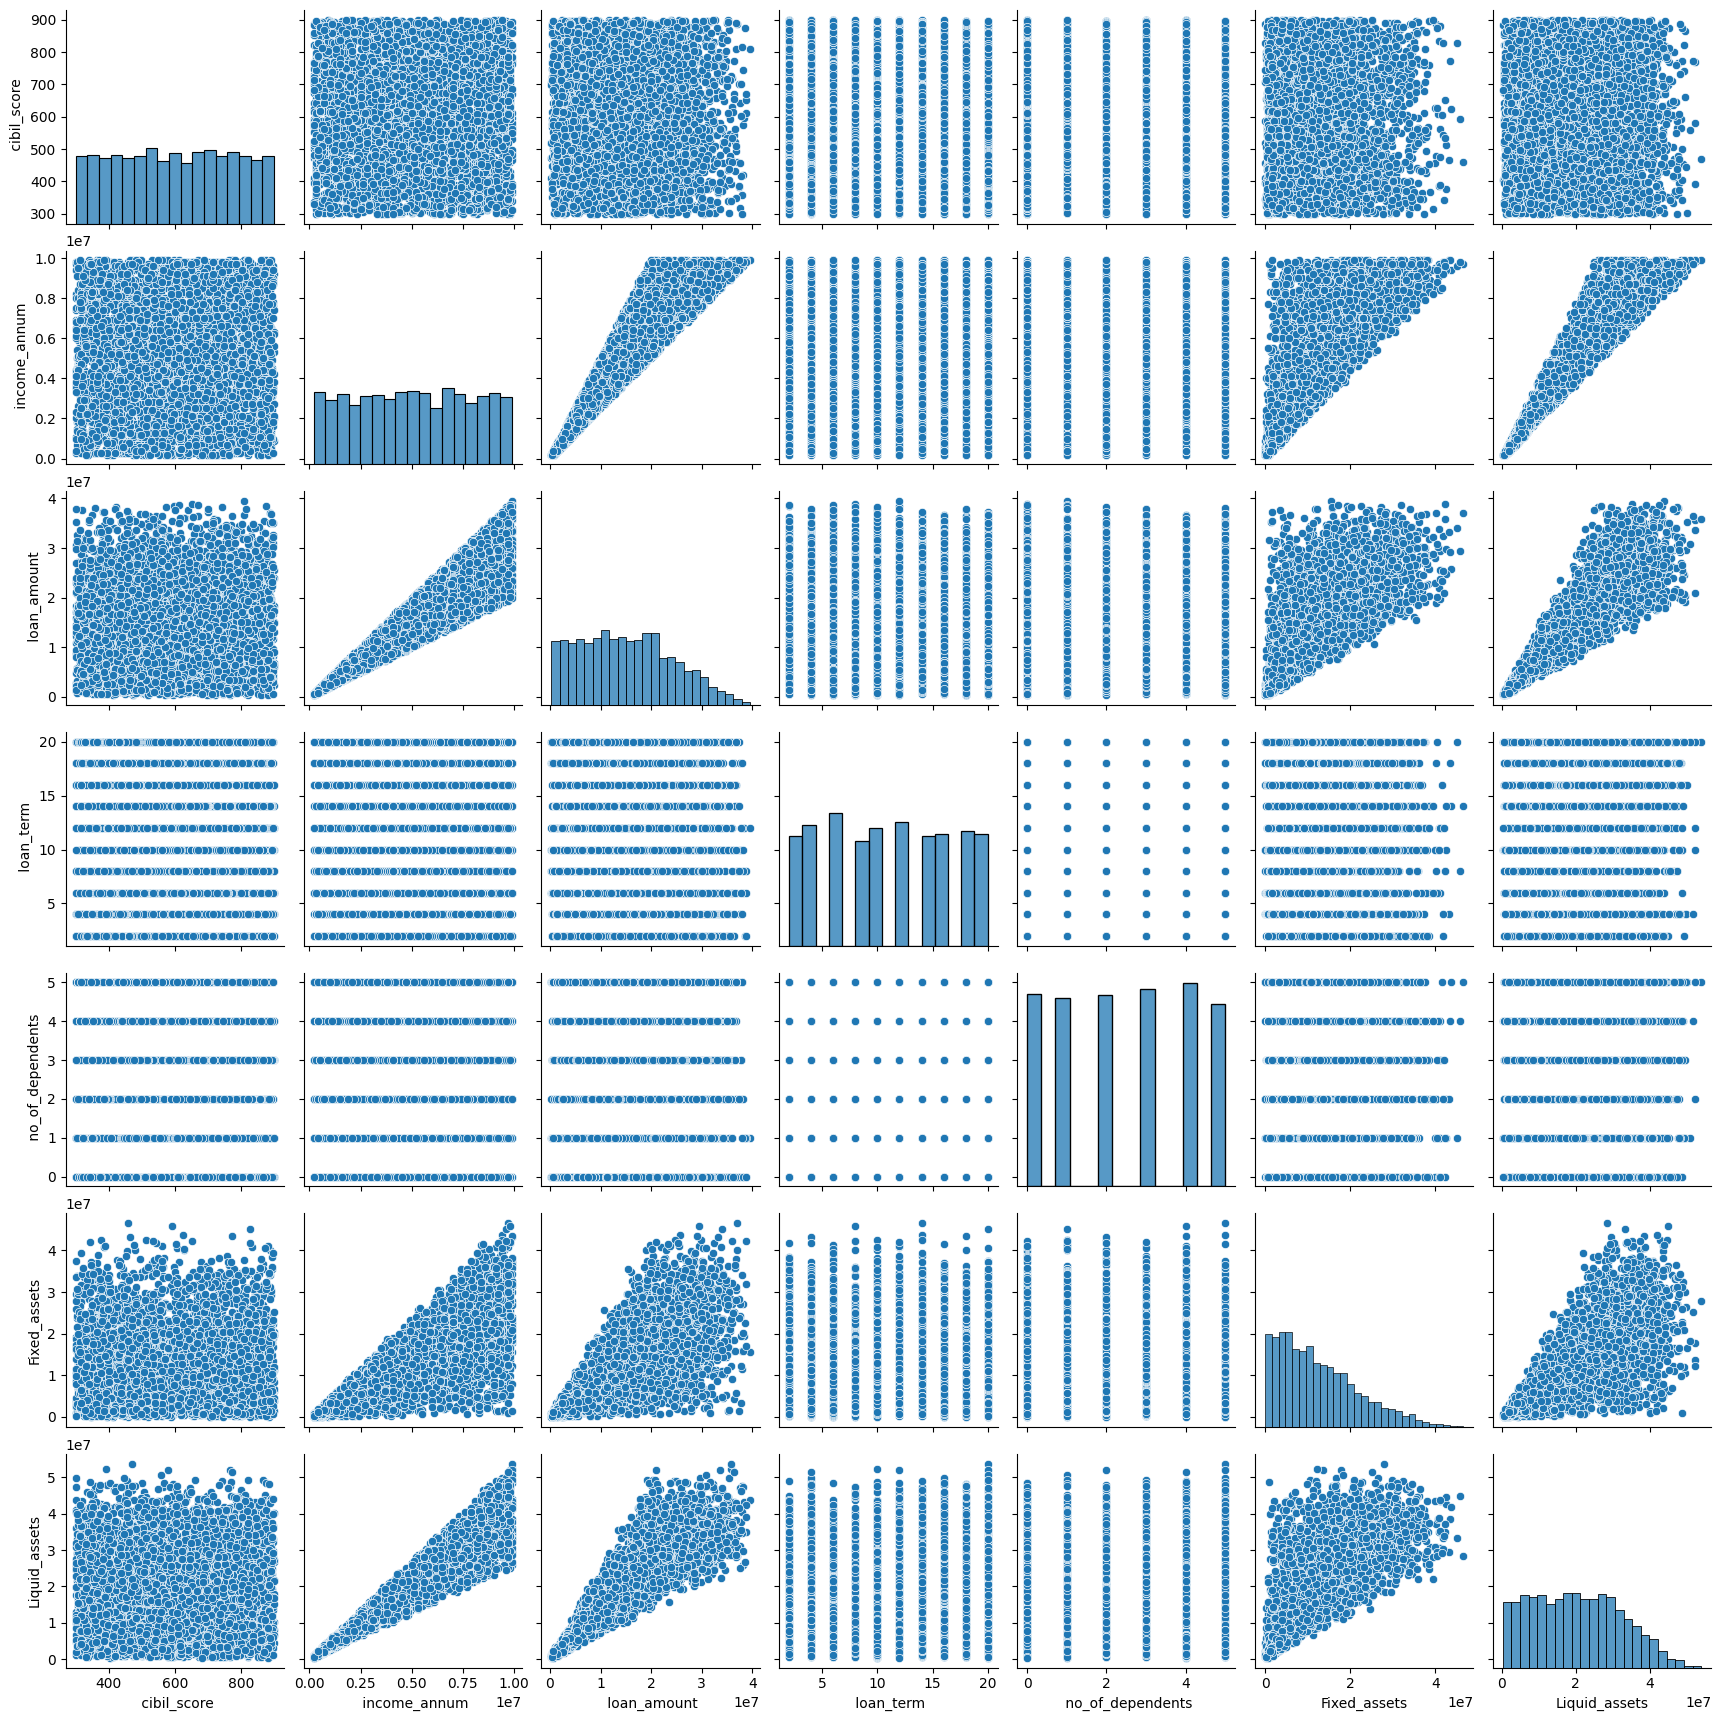

In [13]:
# Pairplot of numerical features in our dataset
sns.pairplot(pred_data)
plt.show()

**Observation from the connection between education levels and self-employment**: Important trends in loan approval are displayed in the graph that shows the employment and educational status of applicants. Remarkably, the majority of graduates are not self-employed, whereas a sizable fraction of non-graduate applicants are. This distinction implies that graduates frequently land salaried jobs, suggesting a more steady source of income and possibly better chances for loan repayment. On the other hand, self-employed non-graduates may experience income volatility, which could make it difficult to make consistent repayments. This does not, however, negate the possibility that self-employed non-graduates could make more money. It is essential to comprehend the relationship between loan approval, employment status, income stability, and education. It underlines how crucial it is to conduct a thorough evaluation of applicants' financial circumstances in order to precisely assess their capacity for repayment. The present analysis highlights the complex correlation among education, employment, and loan approval, underscoring the need for a comprehensive approach in evaluating loan applicants.

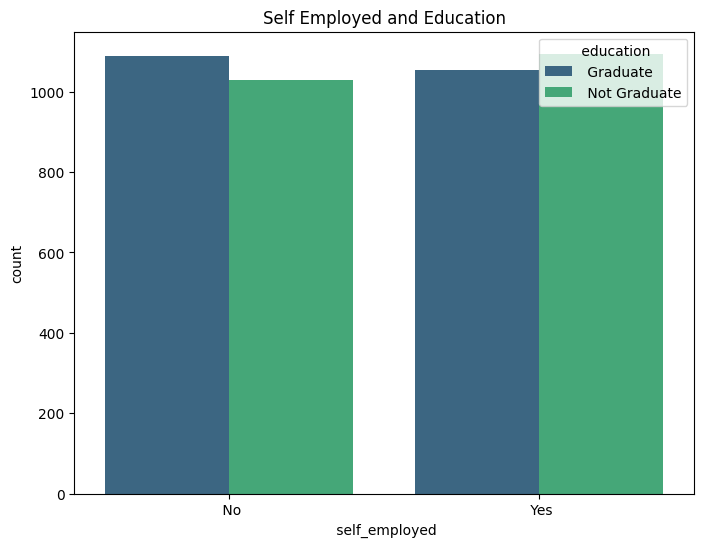

In [14]:
#The connection between education levels and self-employment
plt.figure(figsize=(8, 6))
sns.countplot(x=' self_employed', data=pred_data, hue=' education', palette='viridis')
plt.title('Self Employed and Education')
plt.show()

**Observation from Education based loan status** : There appears to be little difference in loan approval rates between applicants who have graduated and those who have not. It doesn't seem like there is much of a difference between the two groups' numbers of loans that were approved and denied.

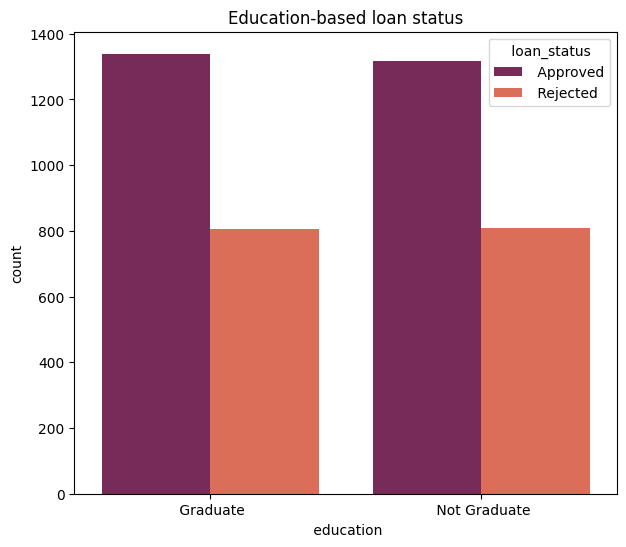

In [15]:
# Loan based on Educational level
plt.figure(figsize=(7,6))
dfg = sns.countplot(x=' education', hue=' loan_status', data=pred_data, palette='rocket')
dfg.set_title('Education-based loan status')
plt.show()

**Observation from Education vs Income Annum** : The relationship between the annual incomes and educational attainment of loan applicants is depicted in the boxplot illustration. It's interesting to note that the median incomes for graduate and non-graduate groups are similar, indicating that having a degree may not always translate into a significant income advantage. The small difference in yearly salaries between graduates and non-graduates may indicate that education has little bearing on whether a loan is approved.

Text(0.5, 1.0, 'Education and Income Annum')

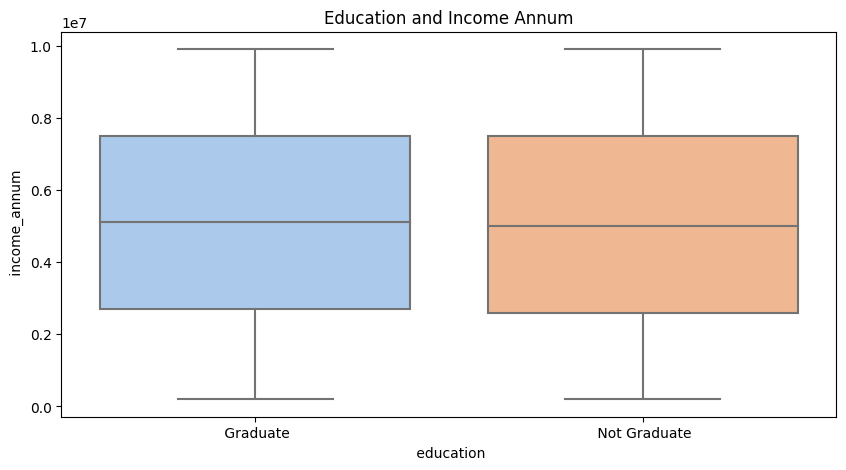

In [16]:
#Education vs Income Annum
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=' education', y=' income_annum', data=pred_data, ax=ax, palette='pastel')
plt.title('Education and Income Annum')

**Observation from Number of Dependents vs loan status** : The visualisation below indicates that there is a propensity for loan rejection rates to rise with the number of dependents. Interestingly, though, the number of loans that are approved stays largely constant regardless of the number of dependents. This calls into question the notion that people with more dependents would receive fewer loan approvals. It highlights how our expectations and the real results we see in loan approvals differ, highlighting the value of data-driven insights over assumptions.

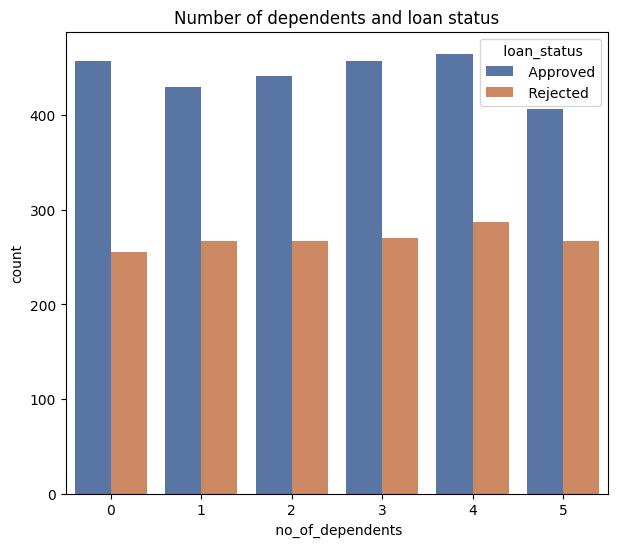

In [17]:
# Number of dependent vs loan status
plt.figure(figsize=(7, 6))
sns.countplot(x=' no_of_dependents', data=pred_data, hue=' loan_status', palette='deep')
plt.title('Number of dependents and loan status')
plt.show()

**Observation from Loan Amount vs loan status** : from the visualisation, one would notice the slight difference between the 'Approved' and 'Rejected' boxplots. This discrepancy could indicate that, generally speaking, loans that are approved tend to be marginally larger than those that are denied in respect to the loan amount.

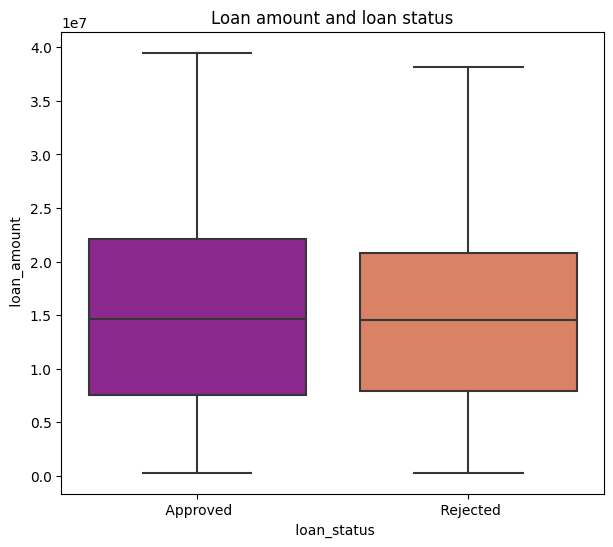

In [18]:
# Loan amount vs loan status
plt.figure(figsize=(7, 6))
sns.boxplot(x=' loan_status', y=' loan_amount', data=pred_data, palette='plasma')
plt.title('Loan amount and loan status')
plt.show()

**Observation from Loan Amount vs Loan term** : The relationship between loan amounts and loan tenure is shown by the line plot. The loan amounts usually vary from 1.4 million to 15.4 million over the course of 2.5 to 7.5 years of loan tenure. Notably, compared to the previous tenures, the loan amounts for the 10-year tenure have increased significantly.

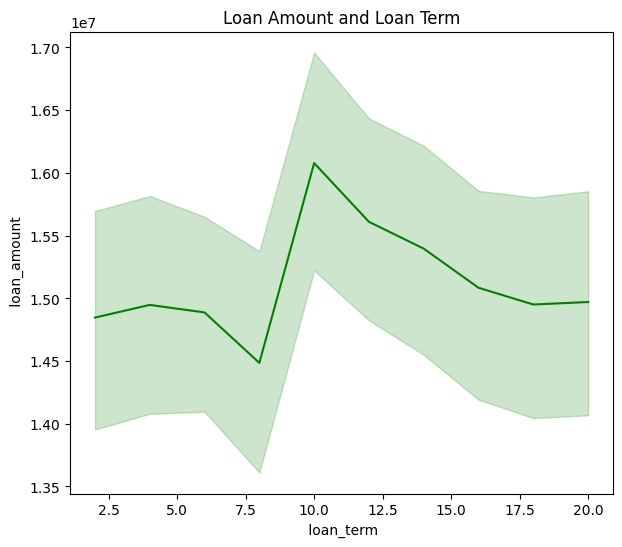

In [19]:
#Loan Amount vs Loan term
plt.figure(figsize=(7, 6))
dyt = sns.lineplot(x=' loan_term', y=' loan_amount', data=pred_data, color='green')
dyt.set_title('Loan Amount and Loan Term')
plt.show()

**Observation from Comparison of Loan Term and Loan Amount against Loan status** : The correlation between loan approval, repayment period, and amount is shown graphically. Reapproved loans, it appears, typically have larger sums and shorter payback terms. Rejected loans, on the other hand, usually have smaller sums and longer payback terms. This pattern may indicate the bank's preference for approving loans that have a high rate of return and can be repaid quickly. Because of the costs involved, handling very small loans might not be as desirable. These decisions are influenced by a number of other factors as well, including the borrower's financial stability. All things considered, the graph provides insight into the factors the bank takes into account when approving or rejecting loans.

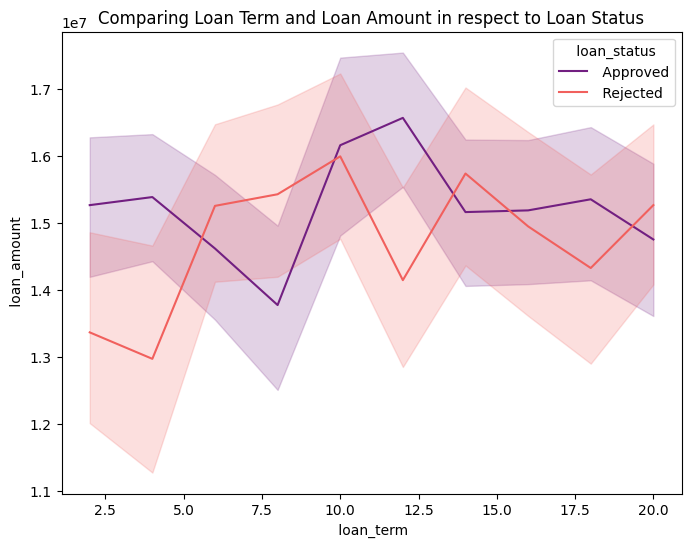

In [20]:
# Comparing Loan Term and Loan Amount in respect to Loan Status
plt.figure(figsize=(8, 6))
dwg = sns.lineplot(x=' loan_term', y=' loan_amount', data=pred_data, hue=' loan_status', palette='magma')
plt.title('Comparing Loan Term and Loan Amount in respect to Loan Status')
plt.show()

**Observation from Liquid Assets vs Fixed Assets** : In loan applications, assets are important because they guarantee repayment, as the images illustrate. Real estate, machinery, and equipment are examples of immovable assets. Movable assets include cash and cash equivalents, stocks, and bonds. With respect to movable assets, most people own less than $30 million, while a smaller percentage own considerably more. The majority of people own less than 12 million immovable assets, and as values rise above 40 million, the number of owners decreases. These charts basically show that a bigger group has assets that are worth less, and that the proportion of assets that fall in value increases. Understanding how assets affect loan evaluations is made easier with this insight.

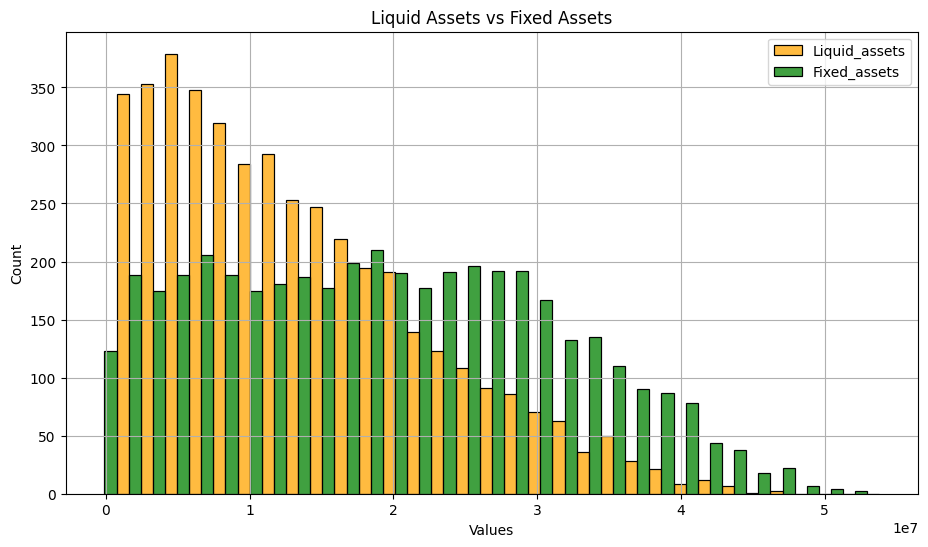

In [21]:
#Merge the data for Liquid_assets and Fixed_assets
merged_assets = pd.concat([pred_data['Liquid_assets'], pred_data['Fixed_assets']], axis=1)
merged_assets = pd.melt(merged_assets)

plt.figure(figsize=(11,6))
g = sns.histplot(merged_assets, x='value', hue='variable', multiple='dodge', palette=['green', 'orange'])
plt.title('Liquid Assets vs Fixed Assets')
plt.legend(title=None, labels=['Liquid_assets', 'Fixed_assets'])
plt.xlabel('Values')
plt.grid(True)
plt.show()

In [22]:
pred_data.head()

,cibil_score,education,income_annum,loan_amount,loan_status,loan_term,no_of_dependents,self_employed,Fixed_assets,Liquid_assets
0,778,Graduate,9600000,29900000,Approved,12,2,No,20000000,30700000
1,417,Not Graduate,4100000,12200000,Rejected,8,0,Yes,4900000,12100000
2,506,Graduate,9100000,29700000,Rejected,20,3,No,11600000,46100000
3,467,Graduate,8200000,30700000,Rejected,8,3,No,21500000,31200000
4,382,Not Graduate,9800000,24200000,Rejected,20,5,Yes,20600000,34400000


**Observation from Liquid and Fixed Assets in respect to Loan Status** : The relationship between loan approval and assets is depicted in the visualization below. The findings indicate that an increase in assets corresponds to a higher chance of loan approval and a lower chance of rejection. Additionally, the illustrations highlight that in this particular context, movable assets are more common than immovable assets.

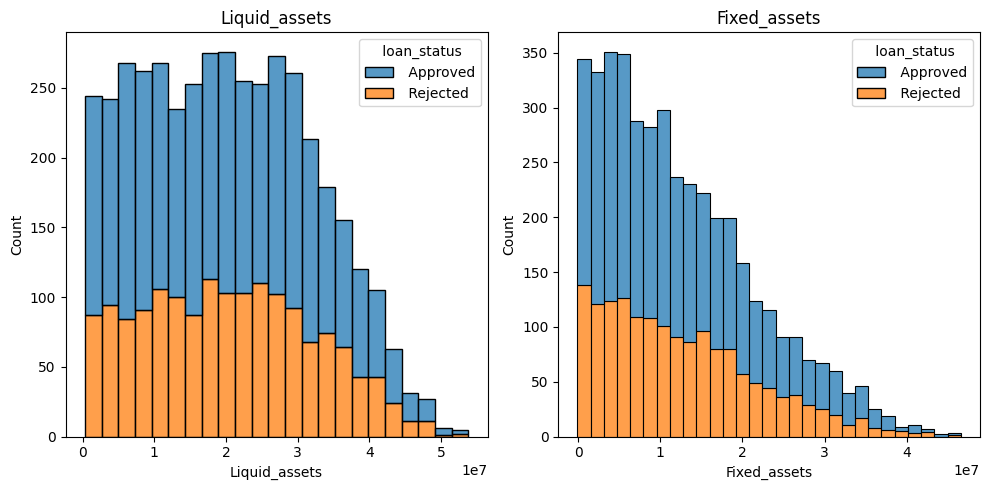

In [23]:
# Liquid and Fixed Assets in respect to Loan Status
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=pred_data, x='Liquid_assets', hue=' loan_status', multiple='stack', ax=axs[0])
axs[0].set_title('Liquid_assets')

sns.histplot(data=pred_data, x='Fixed_assets', hue=' loan_status', multiple='stack', ax=axs[1])
axs[1].set_title('Fixed_assets')

plt.tight_layout()
plt.show()


**Observation from Liquid and Fixed Assets in respect to Income** : There is an intriguing pattern visible in the scatter plot that compares annual income to fixed assets. Plotting indicates a dense concentration of data points in the middle range, indicating that the wealthiest people typically own an average amount of fixed assets. This finding suggests that although individuals with higher incomes may be relatively wealthy, their fixed asset allocation generally follows a distribution that is more average.

However, a different pattern emerges when looking at the scatter plot of annual income versus liquid assets. It clearly shows that there is an increase in the quantity of liquid assets in proportion to income. This correlation implies that there is a proportionate relationship between liquid assets and income levels, meaning that those with higher incomes typically

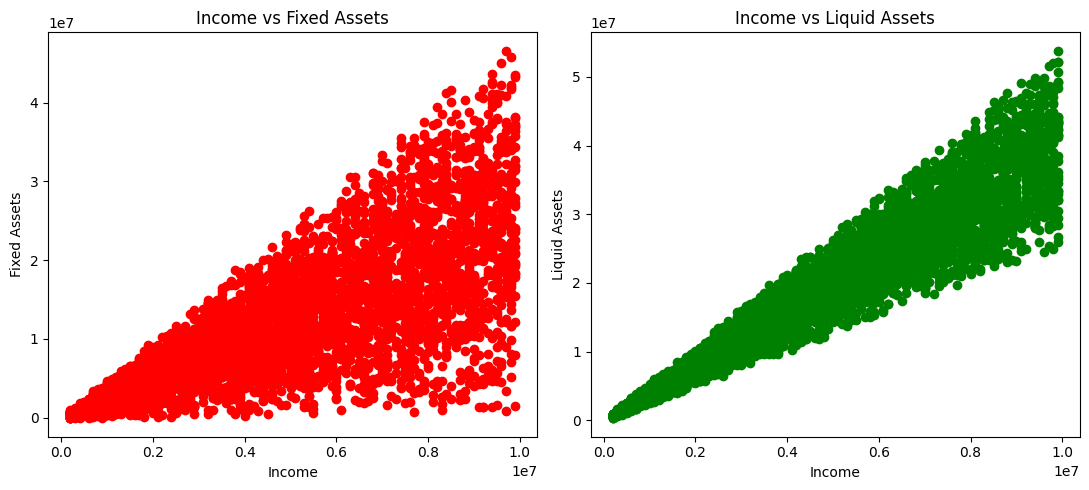

In [24]:
#Liquid and Fixed Assets in respect to income
fig, axs = plt.subplots(1, 2, figsize=(11,5))

# Income vs Fixed Assets plotted
axs[0].scatter(pred_data[' income_annum'], pred_data['Fixed_assets'], color='red')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Fixed Assets')
axs[0].set_title('Income vs Fixed Assets')


#Income vs Liquid Assets plotted
axs[1].scatter(pred_data[' income_annum'], pred_data['Liquid_assets'], color='green')
axs[1].set_xlabel('Income')
axs[1].set_ylabel('Liquid Assets')
axs[1].set_title('Income vs Liquid Assets')

plt.tight_layout()
plt.show()

**Observation from Income per Annum vs Loan Amount** : its obvious that there is a clear relationship between the loan amount and the applicant's yearly income. The loan amount typically increases in tandem with an increase in income. This is because the amount of the loan that the applicant can afford to repay depends largely on their income. From the visualisation, applicants with lower yearly income tends request for a lower loan amount while those with higher yearly income tend to request for a higher loan amount.

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

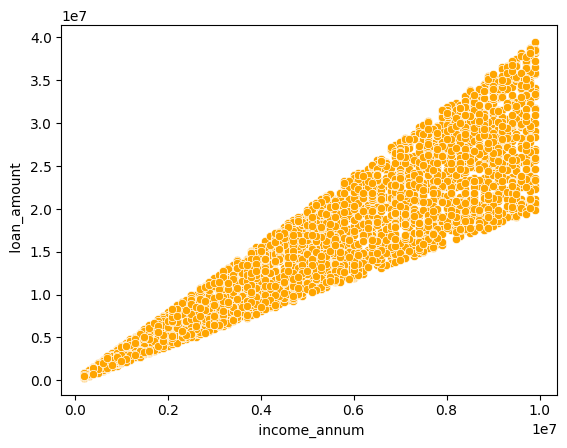

In [25]:
# Income per Annum vs Loan Amount
sns.scatterplot(x=' income_annum', y=' loan_amount', data=pred_data, color='orange')

**Observation from Approval or Rejection rate visualization** : The bar graph shows that loan applications are approved at a higher rate than they are rejected. The influence of the input features on the results of loan approval or rejection is typically the cause of this disparity in approval and rejection rates.

<Axes: xlabel=' loan_status', ylabel='count'>

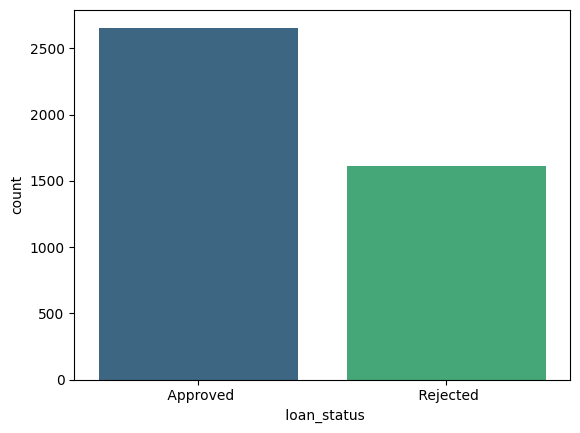

In [26]:
#Knowing the statistic of approvals and Denials
sns.countplot(x =' loan_status',data=pred_data, palette='viridis')

**Encoding of categorical variables** : To improve the modeling process, I converted categorical variables (such as education, self-employment, and loan status) from strings to integers.

In [27]:
#converting education column to integer for proper modeling
pred_data.rename(columns=dict(zip(pred_data.columns,pred_data.columns.str.strip())),inplace=True)
pred_data['education']= pred_data['education'].str.strip()
pred_data['education']= pred_data['education'].map({'Graduate':1,'Not Graduate':0})

#converting self_employed column to integer for proper modeling

pred_data['self_employed']= pred_data['self_employed'].str.strip()
pred_data['self_employed']= pred_data['self_employed'].map({'Yes':1,'No':0})

#converting loan_status column to integer for proper modeling

pred_data['loan_status']= pred_data['loan_status'].str.strip()
pred_data['loan_status']= pred_data['loan_status'].map({'Approved':1,'Rejected':0})


In [28]:
# Lets overview our dataset again to ensure the encoding was successful
pred_data.head()

,cibil_score,education,income_annum,loan_amount,loan_status,loan_term,no_of_dependents,self_employed,Fixed_assets,Liquid_assets
0,778,1,9600000,29900000,1,12,2,0,20000000,30700000
1,417,0,4100000,12200000,0,8,0,1,4900000,12100000
2,506,1,9100000,29700000,0,20,3,0,11600000,46100000
3,467,1,8200000,30700000,0,8,3,0,21500000,31200000
4,382,0,9800000,24200000,0,20,5,1,20600000,34400000


**Interpretation** : For every attribute in the dataset, boxplots and histograms are produced by these lines of code below. For each attribute, the boxplots (on the left) give a summary of the distribution's spread, central tendency, and possible outliers. The shape of the distribution and the concentration of data points for each attribute are shown by the histograms (on the right), which show the frequency or count of values. This dual visualization aids in comprehending how the data is distributed and shaped across various attributes.

**Taking Cibil Score for example** : If you look closely, most of the clients have low CIBIL scores—many of them are below 632—which could make loan approvals difficult. Even so, the bank benefits from the fact that a sizable fraction of its customers have high scores—beyond 632. Leveraging this, the bank could lure these high-scoring clients into considering loans with targeted benefits and alluring offers. Considering that they generally have better money management skills, this finding suggests that those with higher CIBIL scores have a better chance of getting a loan approved. Ultimately, this knowledge gives the bank the ability to make choices that are advantageous to the organization and its customers.

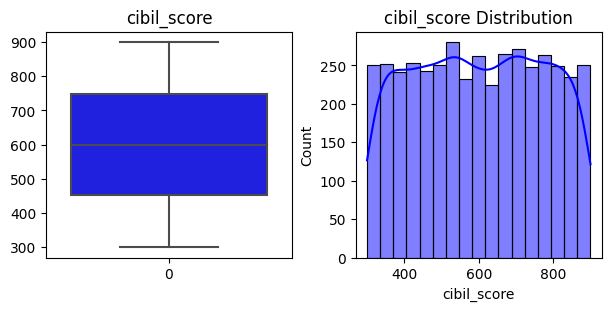

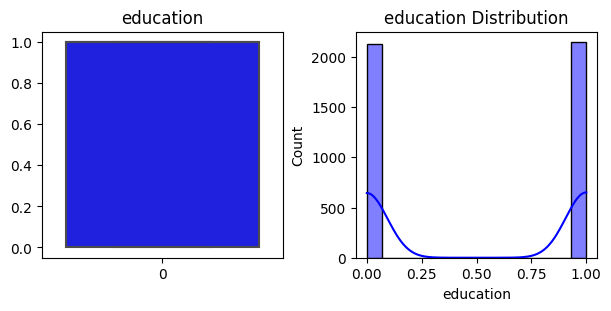

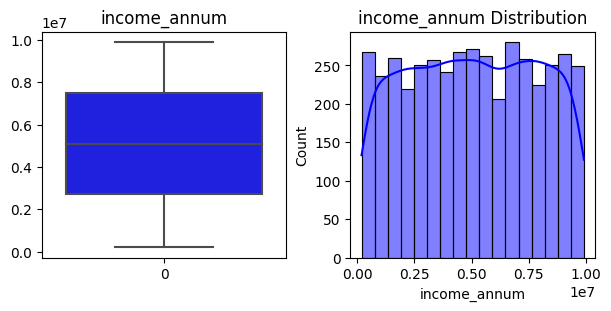

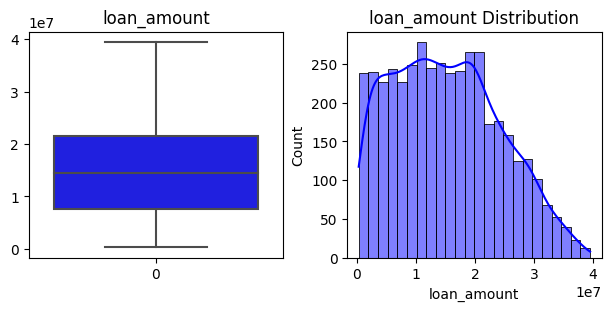

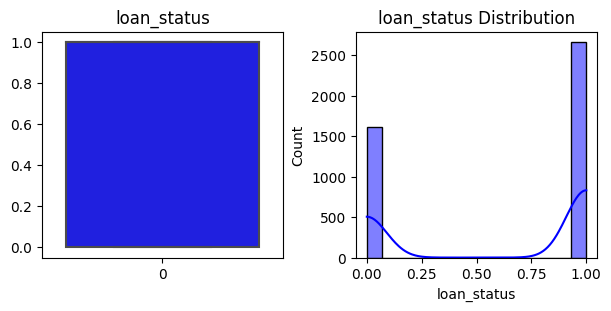

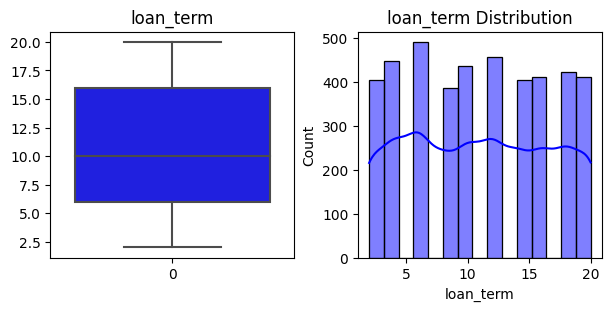

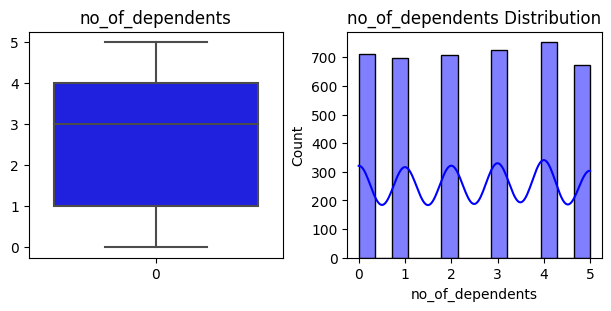

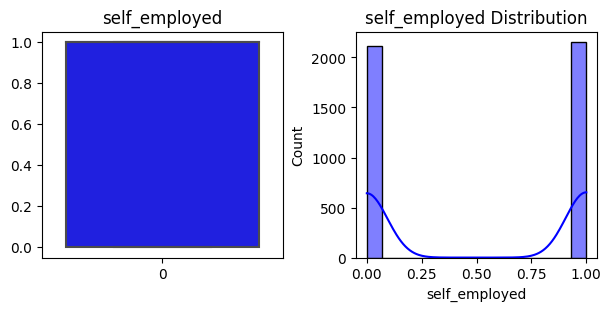

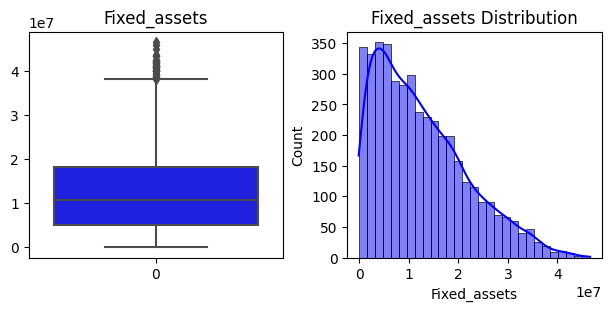

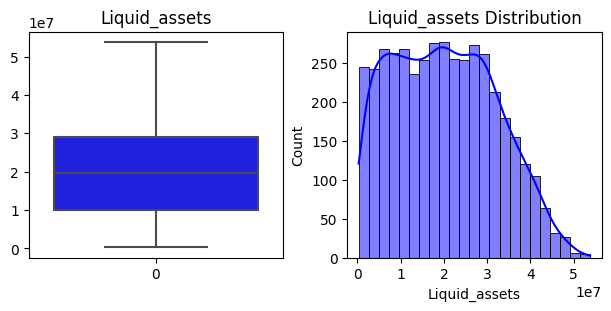

In [29]:
#Lets see the distribution of each attributes

for columns in pred_data.columns:
    fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
    sns.boxplot(pred_data[columns], ax= axs[0],color ="blue").set_title(columns)
    sns.histplot(pred_data[columns], ax= axs[1],color ="blue",kde=True).set_title(columns+" Distribution")
    plt.show()

# Reducing the big values in the data

**Interpretation for the feature scaling** : In order to preserve consistency and improve the model's performance during training, feature scaling is essential. By scaling numerical features, such as asset values, annual income, and loan amounts, certain features are prevented from dominating or exerting undue influence because of their larger scales. Instead, all of these attributes fall within a similar numerical range. By ensuring that each attribute contributes proportionately to the model, this procedure helps to improve convergence during the model training process and prevents biases towards particular features.

In [30]:
# Feature Scaling: Asset Values, Annual Income, and Loan Amount
pred_data[['loan_amount', 'income_annum', 'Fixed_assets', 'Liquid_assets']] /= 1_00_000

In [31]:
# Lets overview our dataset to ensure the feature scaling worked
pred_data.head()

,cibil_score,education,income_annum,loan_amount,loan_status,loan_term,no_of_dependents,self_employed,Fixed_assets,Liquid_assets
0,778,1,96.0,299.0,1,12,2,0,200.0,307.0
1,417,0,41.0,122.0,0,8,0,1,49.0,121.0
2,506,1,91.0,297.0,0,20,3,0,116.0,461.0
3,467,1,82.0,307.0,0,8,3,0,215.0,312.0
4,382,0,98.0,242.0,0,20,5,1,206.0,344.0


**Interpretation** : This visualization is helpful in identifying correlated features, understanding their associations, and pinpointing potential multicollinearity issues for model building and feature selection

<Axes: >

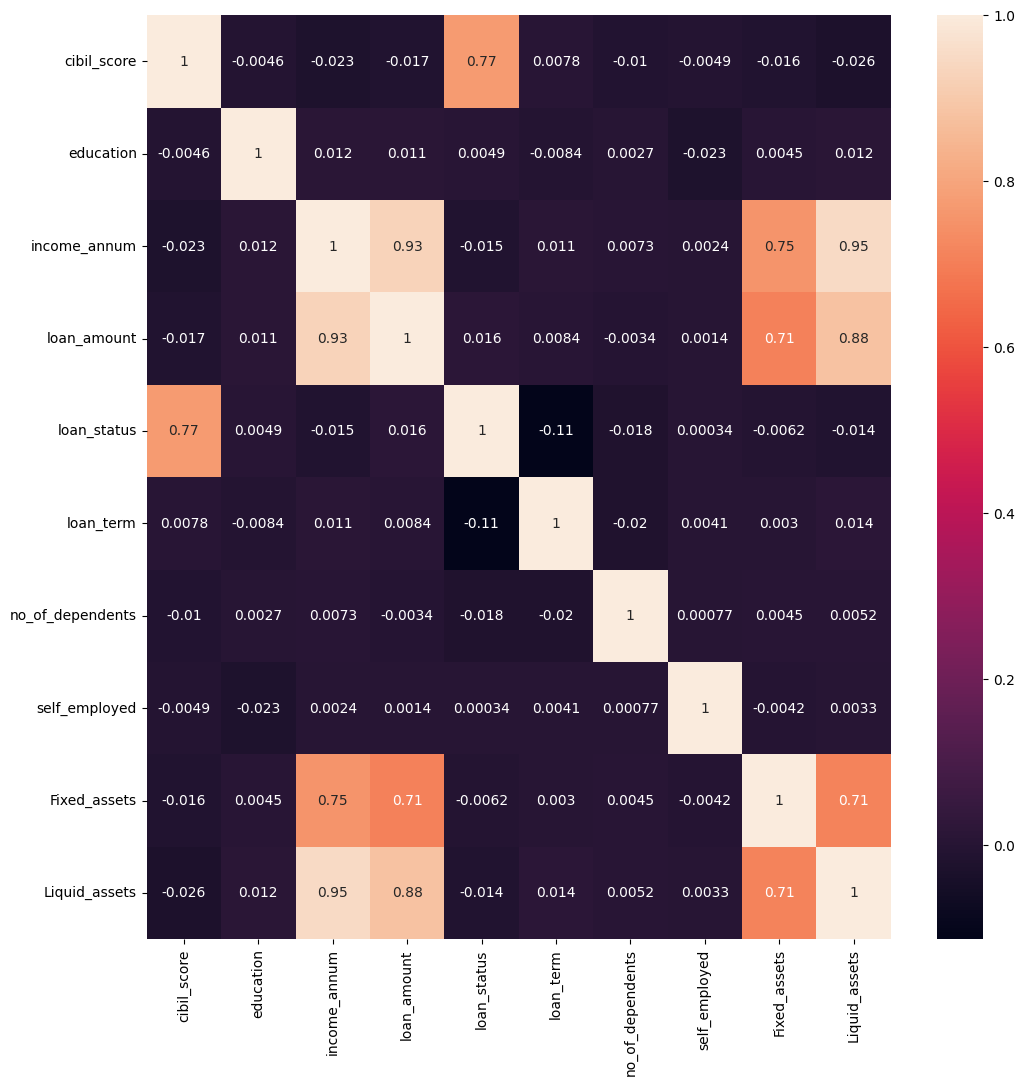

In [32]:
# Correlation matrix of our features using heatmap
plt.figure(figsize=(12,12))
sns.heatmap(pred_data.corr(), annot = True)

**Interpretation** : The 'loan_status' column and every other column in the dataset are correlated, as determined by this. The linear relationship between the 'loan_status' and each attribute is generated along with a range of correlation coefficients that show the degree and direction of connection. To assist with feature selection and predictive modeling, this analysis identifies features that have strong correlations with loan approval or rejection. The outcomes of loans may be more significantly influenced by features with higher correlation values.Cibil Score, Education and Self Employed status are positively correlated with the target variable especially cibil score with a correlation of 0.770518

In [33]:
# Correlation of Loan Status with Other Variables
loan_status_corr = pred_data.corr()['loan_status']
print(loan_status_corr)

cibil_score         0.770518
education           0.004918
income_annum       -0.015189
loan_amount         0.016150
loan_status         1.000000
loan_term          -0.113036
no_of_dependents   -0.018114
self_employed       0.000345
Fixed_assets       -0.006200
Liquid_assets      -0.013755
Name: loan_status, dtype: float64


**Observation from Cibil score vs Loan Status** : A significant pattern is shown by the boxplot; borrowers who are approved for loans typically have higher CIBIL scores—mostly above 600. The scores of people whose loans are denied, on the other hand, vary more widely and are usually lower than 500. The importance of having a higher CIBIL score—more specifically, one that is above 600—on the likelihood of getting approved for a loan is highlighted by this. Plot: A high CIBIL score is a critical factor in determining the outcome of loan approval.

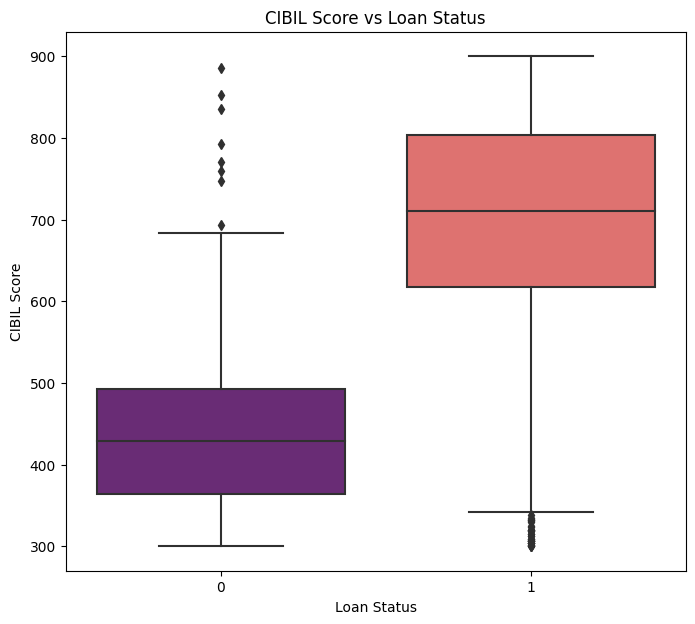

In [34]:
# Cibil Score vs Loan Status
plt.figure(figsize=(8, 7))
sns.boxplot(x='loan_status', y='cibil_score', data=pred_data, palette='magma')
plt.title('CIBIL Score vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.show()

**Observation from liquid and fixed assets compared to Loan amount** : The loan amount and both liquid and fixed assets are directly correlated. Larger loan offers from the bank are more likely to be extended to people with larger assets, either fixed or liquid. According to this relationship, a rise in asset holdings has a favorable impact on the possible loan amount that a bank will grant.

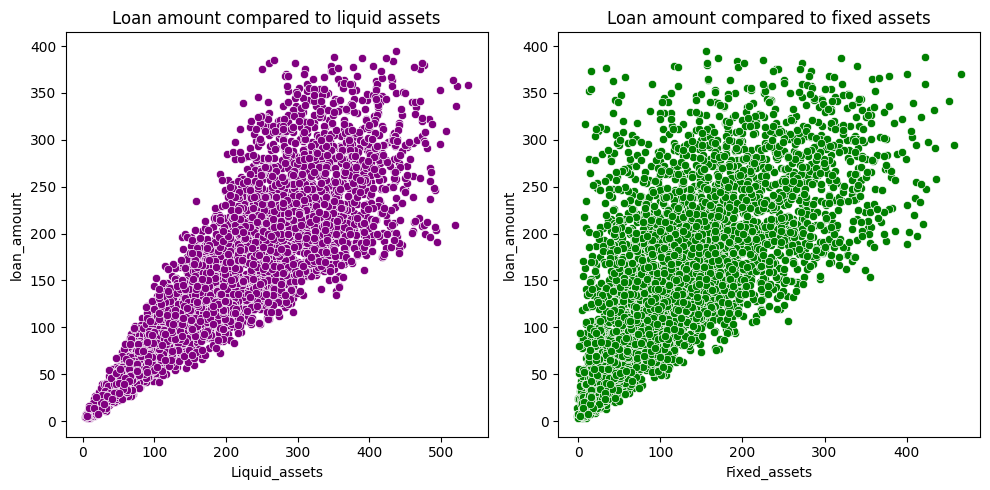

In [35]:
# Observation from liquid and fixed assets in respect to loan amount
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='Liquid_assets', y='loan_amount', data=pred_data, ax=ax1, color='purple').set_title('Loan amount compared to liquid assets')
sns.scatterplot(x='Fixed_assets', y='loan_amount', data=pred_data, ax=ax2, color='green').set_title('Loan amount compared to fixed assets')

plt.tight_layout()
plt.show()

# **Modeling**

**Interpretation** : The features used in modeling or prediction are contained in x, with the exception of the 'loan_status' column.
y is the target variable for tasks involving prediction or classification, containing the 'loan_status' column.

In [36]:
#defining the scalar instance
scaler = StandardScaler()

x = pred_data.drop(columns=['loan_status'])
y = pred_data['loan_status']

print(x)
print(y)

      cibil_score  education  income_annum  loan_amount  loan_term  \
0             778          1          96.0        299.0         12   
1             417          0          41.0        122.0          8   
2             506          1          91.0        297.0         20   
3             467          1          82.0        307.0          8   
4             382          0          98.0        242.0         20   
...           ...        ...           ...          ...        ...   
4264          317          1          10.0         23.0         12   
4265          559          0          33.0        113.0         20   
4266          457          0          65.0        239.0         18   
4267          780          0          41.0        128.0          8   
4268          607          1          92.0        297.0         10   

      no_of_dependents  self_employed  Fixed_assets  Liquid_assets  
0                    2              0         200.0          307.0  
1                    

**Interpretation** : Applied the StandardScaler to standardize the feature set x. The features are scaled to have a mean of 0 and a standard deviation of 1 in order to transform them.

In [37]:
# Standardize the feature set x
x= scaler.fit_transform(x)

**Interpretation** : Divided the target variable (y) and the standardized feature set (x) into training and testing subsets using train_test_split. 20% of the data is set aside for testing (x_test, y_test), and the remaining 80% is allocated to training (x_train, y_train). This division makes it possible to train a model on one component and evaluate it on another to gauge its effectiveness. Reproducibility is guaranteed during the splitting process by the random_state=42.

In [38]:
# Using train_test_split to divide y variable and x feature set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **I examined my dataset using four distinct classification models**

# Logistic Regression


**Interpretation** : Entails using the LogisticRegression algorithm from scikit-learn to create and train a logistic regression model. Following the fitting of the model using the training data (x_train and y_train), predictions (ypredictionlog) are produced for the test data (x_test).

Also computed and displayed the three main evaluation metrics for a logistic regression model used in a classification task: accuracy, precision, and recall. Based on the test data, these metrics evaluate how well the model predicts the target variable.

In [39]:
# creating and training logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)
ypredictionlog = log_reg.predict(x_test)

In [40]:
#Check for accuracy with ypredictionlog
accuracy = accuracy_score(y_test, ypredictionlog)
precision = precision_score(y_test, ypredictionlog, average='weighted')
recall = recall_score(y_test, ypredictionlog, average='weighted')
print("Accuracy: ",round(accuracy,3))
print("precision: ",round(precision,3))
print("recall: ",round(recall,3))



Accuracy:  0.905
precision:  0.905
recall:  0.905


# Using Decision Tree model

**Interpretation** : Utilizes training data (x_train, y_train) to train a Decision Tree Classifier, which then produces predictions for the test dataset (x_test). The final forecasts are kept in the ypredictiontree.

Determines the accuracy, precision, and recall scores of a Decision Tree Classifier model and presents the results. By using test data as a basis, these metrics assess how well the model predicts the desired variable.

In [41]:
#Uses training data to train a decision tree classifier
decisiontree_model = DecisionTreeClassifier(random_state=42)
decisiontree_model.fit(x_train, y_train)
ypredictiontree = decisiontree_model.predict(x_test)

In [42]:
#Check for Accuracy
accuracy = accuracy_score(y_test, ypredictiontree)
precision = precision_score(y_test, ypredictiontree, average='weighted')
recall = recall_score(y_test, ypredictiontree, average='weighted')

print("Accuracy: ",round(accuracy,3))
print("precision: ",round(precision,3))
print("recall: ",round(recall,3))



Accuracy:  0.981
precision:  0.981
recall:  0.981


# Using Random Forest

**Interpretation** : combines training data to build and train a Random Forest Classifier model, which is then applied to test data to predict results.

Provides the recall, precision, and accuracy scores for the Random Forest Classifier model that I used in my analysis.

In [43]:
#Using training data to build and train a Random Forest Classifier Model
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(x_train, y_train)
ypredictionforest = randomforest.predict(x_test)

In [44]:
# Check for Accuracy
accuracy = accuracy_score(y_test, ypredictionforest)
precision = precision_score(y_test, ypredictionforest, average='weighted')
recall = recall_score(y_test, ypredictionforest, average='weighted')
print("Accuracy: ",round(accuracy,3))
print("precision: ",round(precision,3))
print("recall: ",round(recall,3))



Accuracy:  0.978
precision:  0.978
recall:  0.978


# Using XGBoost Model

**Interpretation** : Starts with the training data, uses it to train and initialize an XGBoost classifier, and then applies it to predict test data outcomes. Gradient boosting techniques are the means by which XGBoost, a machine learning algorithm, effectively handles complex datasets.

Evaluates and presents the recall, accuracy, and precision scores for the predictions made by the XGBoost model. The model's ability to correctly identify true positives and make accurate predictions is evaluated by these scores.

In [45]:
# Uses training data to train an XGBoost Classifier
Xgboost = XGBClassifier(random_state=42)
Xgboost.fit(x_train, y_train)
ypredictionxg = Xgboost.predict(x_test)

In [46]:
# Check for accuracy
accuracy = accuracy_score(y_test, ypredictionxg)
precision = precision_score(y_test, ypredictionxg, average='weighted')
recall = recall_score(y_test, ypredictionxg, average='weighted')
print("Accuracy: ",round(accuracy,3))
print("precision: ",round(precision,3))
print("recall: ",round(recall,3))

Accuracy:  0.982
precision:  0.982
recall:  0.982


# **Model Performance Evaluation**

**Interpretation** : Confusion Matrix generation and comparison for Decision Tree and XGBoost models is performed. As a visual evaluation of each model's predictive performance, these matrices show the counts of accurate and inaccurate predictions made by each model.

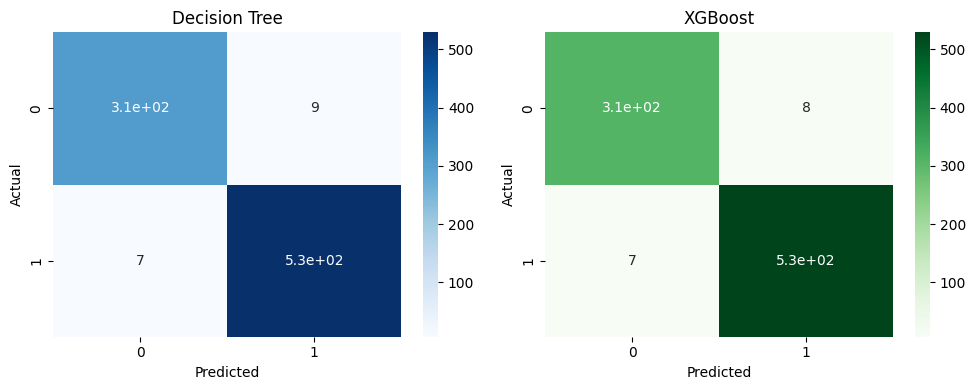

In [47]:
from sklearn.metrics import confusion_matrix

# Confusion matrix calculations for both models
cm_dectree = confusion_matrix(y_test, ypredictiontree)
cm_xgboost = confusion_matrix(y_test, ypredictionxg)

# Confusion matrix plotting for Decision Tree
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_dectree, annot=True, cmap='Blues')
plt.title('Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion matrix plotting for XGBoost
plt.subplot(1, 2, 2)
sns.heatmap(cm_xgboost, annot=True, cmap='Greens')
plt.title('XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [48]:
# Double check accuracy for Decision Tree
model_accuracy = ((3.1e+02) + (5.3e+02)) / ((3.1e+02) + (5.3e+02) + 7 + 9)
print('The model accuracy for decision tree algorithm is : ', model_accuracy)


The model accuracy for decision tree algorithm is :  0.9813084112149533


In [49]:
# Double check accuracy for XGBoost
model_accuracy = ((3.1e+02) + (5.3e+02)) / ((3.1e+02) + (5.3e+02) + 7 + 8)
print('The model accuracy for XGBoost algorithm is : ', model_accuracy)

The model accuracy for XGBoost algorithm is :  0.9824561403508771


# **Conclusion**

With this project, the complex world of loan approval was explored through statistical analysis and modelling. Its investigation of several elements revealed how important the CIBIL score is in deciding the status of loans. With XGBoost having the highest accuracy of 98.24%, it produced strong predictive models by utilizing sophisticated algorithms such as Decision Tree and XGBoost. Informed and data-driven financial decisions are made possible by the insights obtained, which enable lenders and borrowers to optimize loan applications and asset portfolios.

---

